In [1]:
# %matplotlib widget
%matplotlib inline

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
import scipy as sp
import json
import cProfile
import re 
from timeit import default_timer as timer

from scipy.fft import fft, fftfreq

from slab.instruments.instrumentmanager import InstrumentManager
#from slab.instruments.instrumenttypes import Instrument
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from datetime import datetime
import experiments as meas
import autocalib_config as cfg

import yaml
import config

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

import importlib 
importlib.reload(meas)
cfg_path='C:\\_Data\\LLqub2\\Tuning_2024_04_10\\'
expt_path='C:\\_Data\\LLqub2\\Tuning_2024_04_10\\'

# Results config file:

cfg_file = 'autocalibration_cfg.yml'
cfg_path = cfg_path + cfg_file
cfg_file = cfg_path 
auto_cfg = config.load(cfg_path)

# Connect to instruments 
im = InstrumentManager(ns_address='192.168.137.1') # SLAC lab

soc = QickConfig(im[auto_cfg['aliases']['soc']].get_cfg())
print(soc)
print(auto_cfg['aliases']['soc'])
print(soc.description())

Could not import QickSoc: No module named 'pynq'
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load labbrick
Could not load Autonics TM4 Driver
imported experiments.clifford_averager_program
imported experiments.fitting
imported experiments.qram_protocol_timestepped
imported experiments.single_qubit.acstarkshift_spectroscopy
imported experiments.single_qubit.amplitude_rabi
imported experiments.single_qubit.crud
imported experiments.single_qubit.DONOTUSE_ramsey_ef
imported experiments.single_qubit.DONOTUSE_randbench
imported experiments.single_qubit.length_rabi
imported experiments.single_qubit.pulse_probe_ef_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy_test
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.rfsoc_tof_calibration
imported experiments.single_qubit.SingleRB
imported experiments.single_qub

In [10]:
from datetime import date

today = date.today()
date_str = today.strftime("%Y-%m-%d")
pth='C:\\_Data\\LLqub2\\'
folder_name = f"T1_cont_{date_str}_01"
os.mkdir(pth + folder_name)
expt_path = pth + folder_name + '\\'


In [3]:
expt_path

'C:\\_Data\\LLqub2\\T1_cont_2024-04-22_01\\'

using phase reset
<Pyro4.core.Proxy at 0x1841636c2b0; not connected; for PYRO:obj_1340f26f72be44739eac7186832f7ab4@192.168.137.233:45253>


  0%|          | 0/30000 [00:00<?, ?it/s]

using phase reset


  0%|          | 0/30000 [00:00<?, ?it/s]

Unrotated:
Ig -0.7147971360381862 +/- 4.219313746808017 	 Qg -2.15252766326752 +/- 4.149189061037269 	 Amp g 2.2681072035554943
Ie -14.747125189845953 +/- 5.3540699206837 	 Qe -3.981557821653287 +/- 4.229971517957792 	 Amp e 15.275159706273369
Rotated:
Ig 0.9948443916616158 +/- 4.219313746808017 	 Qg 2.0680766866561306 +/- 4.149189061037269 	 Amp g 2.2949197252869586
Ie 15.152086884854878 +/- 5.3540699206837 	 Qe 2.0984897391988535 +/- 4.229971517957792 	 Amp e 15.296711939227793
Saving C:\_Data\LLqub2\T1_cont_2024-04-22_03\00001_single_shot_qubit0.h5
Unrotated:
Ig -0.7147971360381862 +/- 4.219313746808017 	 Qg -2.15252766326752 +/- 4.149189061037269 	 Amp g 2.2681072035554943
Ie -14.747125189845953 +/- 5.3540699206837 	 Qe -3.981557821653287 +/- 4.229971517957792 	 Amp e 15.275159706273369
Rotated:
Ig 0.9948443916616158 +/- 4.219313746808017 	 Qg 2.0680766866561306 +/- 4.149189061037269 	 Amp g 2.2949197252869586
Ie 15.152086884854878 +/- 5.3540699206837 	 Qe 2.0984897391988535 +/- 4.

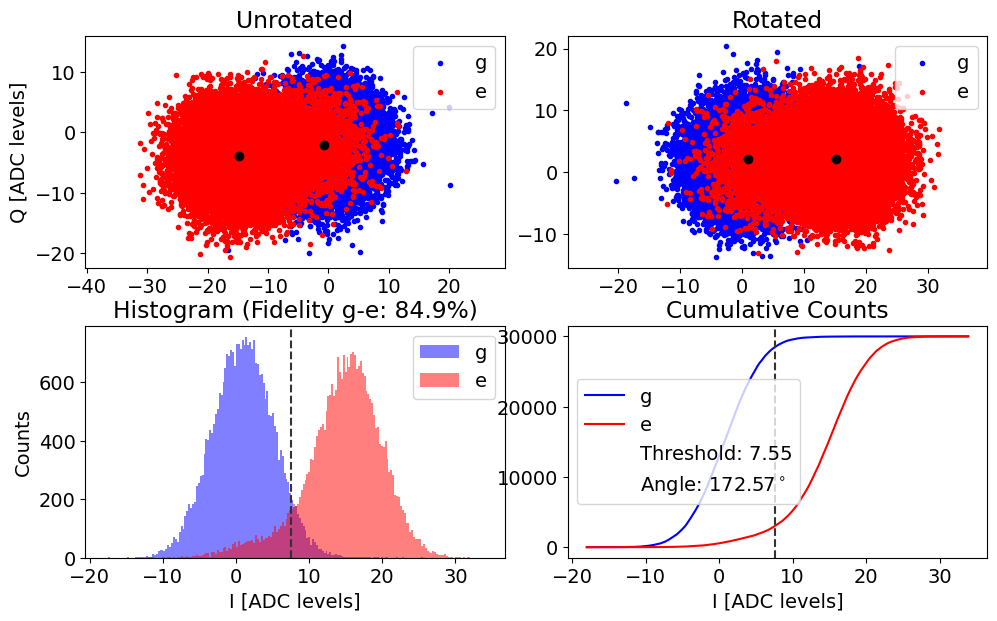

ge fidelity (%): 84.87282909430314
rotation angle (deg): 172.5737049674312
threshold ge: 7.551752844397033
*Set cfg resonator 0 phase to 172.5737049674312 from 173.53315211908838*
*Set cfg resonator 0 threshold to 7.551752844397033 from 7.547770806846636*
qTest =  0.10756321530046402
gauss


  0%|          | 0/4000 [00:00<?, ?it/s]

Saving C:\_Data\LLqub2\T1_cont_2024-04-22_03\00001_amp_rabi_qubit0.h5
Pi gain from amps data [dac units]: 15167
	Pi/2 gain from amps data [dac units]: 7583
Pi gain from avgi data [dac units]: 15136
	Pi/2 gain from avgi data [dac units]: 7568
Pi gain from avgq data [dac units]: 15341
	Pi/2 gain from avgq data [dac units]: 7670


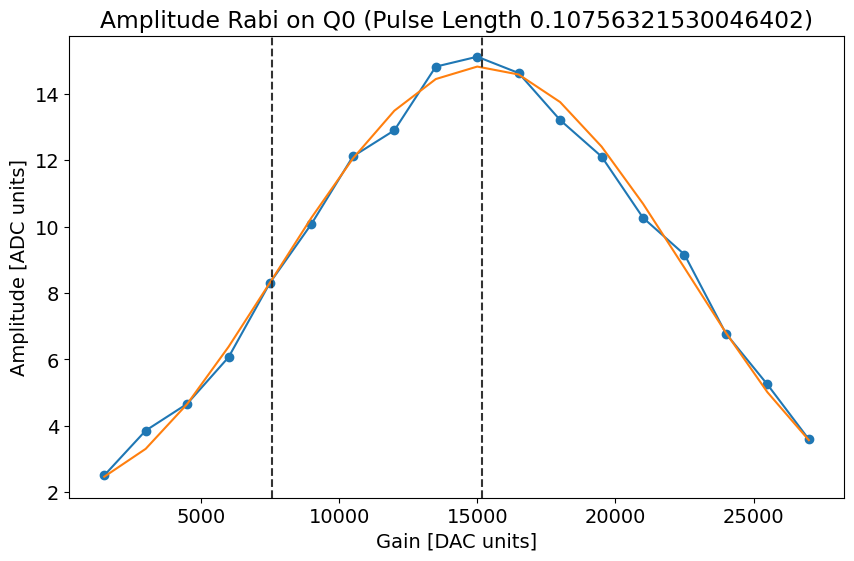

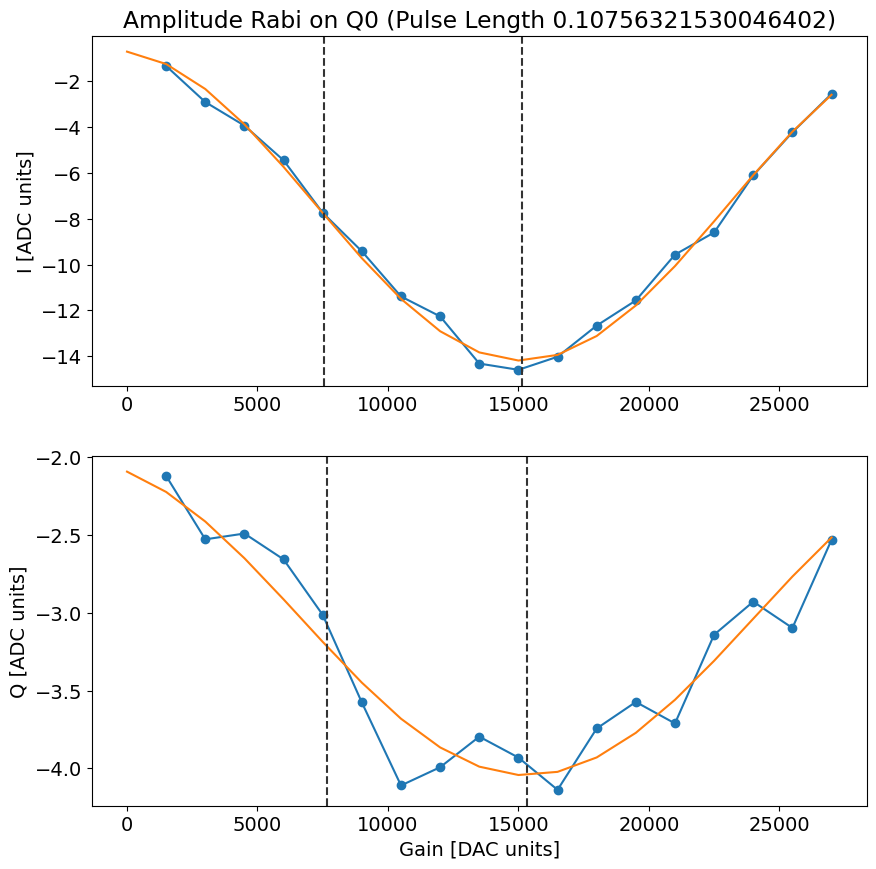

  0%|          | 0/6250 [00:00<?, ?it/s]

c:\_Lib\python\rfsoc\elaine_rfsoc\slab_rfsoc_expts\experiments\fitting.py:64: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)


t1_i error:fit ratio= 0.10060716707558008
t1_q error:fit ratio= 1.619663961075015
t1_i is better, saving T1_i to results cfg file
Saving C:\_Data\LLqub2\T1_cont_2024-04-22_03\00003_t1_qubit0.h5
Fit T1 avgi [us]: 104.13414129971143
Fit T1 avgq [us]: 11.654555775738444


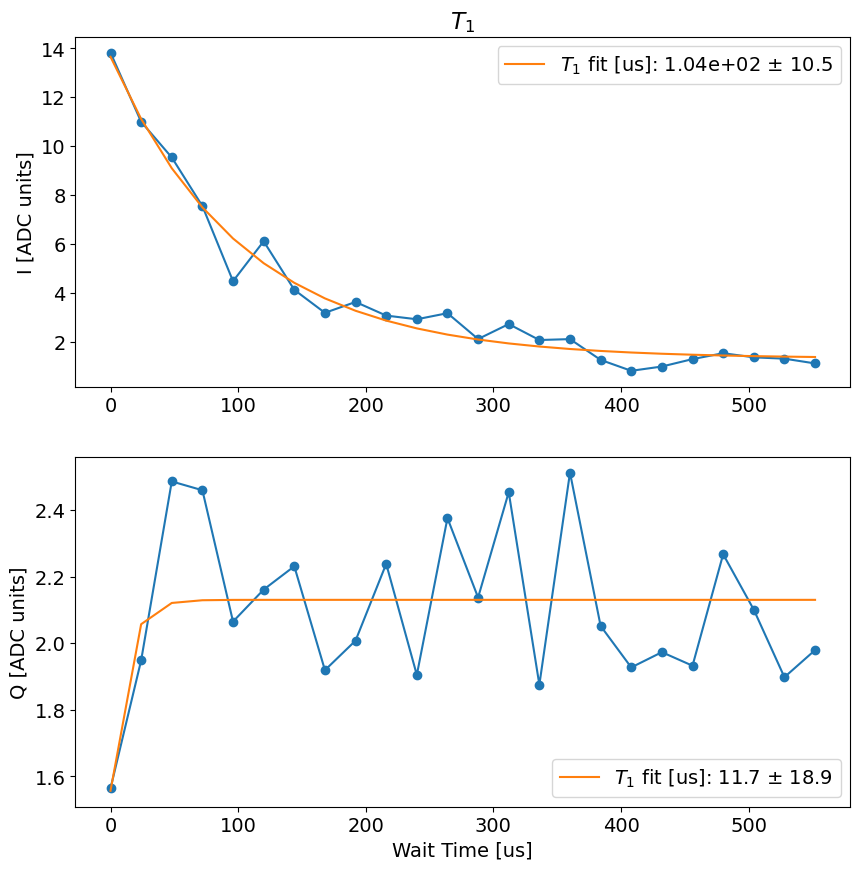

  0%|          | 0/6250 [00:00<?, ?it/s]

t1_i error:fit ratio= 0.09435106772449621
t1_q error:fit ratio= -1215.3364318801127
t1_q is better, saving t1_q to results cfg file
Saving C:\_Data\LLqub2\T1_cont_2024-04-22_03\00004_t1_qubit0.h5
Fit T1 avgi [us]: 122.94950134945925
Fit T1 avgq [us]: -13967.84862381501


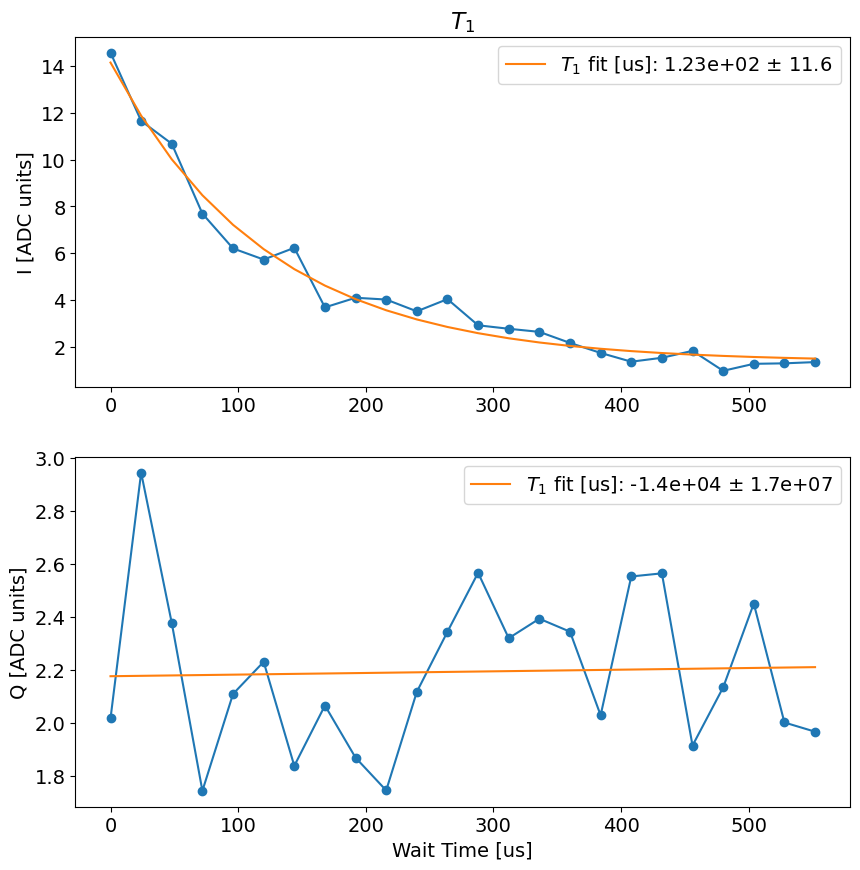

  0%|          | 0/6250 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
i=0
while True:
    shot = cfg.make_singleshot(soc, expt_path, cfg_path, i, reps=30000)
    shot.go(analyze=True, display=True, progress=True, save=True)
   
    config.update_readout(cfg_file, 'phase', float(shot.data['angle']), i)
    config.update_readout(cfg_file, 'threshold', float(shot.data['thresholds'][0]), i)
    
    amp_rabi = cfg.make_amprabi(soc, expt_path, cfg_path, i, npts=20, reps=200)
    amp_rabi.go(analyze=True, display=True, progress=True, save=True)
    
    t1 = cfg.make_t1(soc, expt_path, cfg_path, i, npts=25, reps=250)
    t1.go(analyze=True, display=True, progress=True, save=True)
    t1_1 = t1.data['fit_avgi'][3]
    t1 = cfg.make_t1(soc, expt_path, cfg_path, i, npts=25, reps=250)

    t1.go(analyze=True, display=True, progress=True, save=True)
    t1_2 = t1.data['fit_avgi'][3]
    t1 = cfg.make_t1(soc, expt_path, cfg_path, i, npts=25, reps=250)

    t1.go(analyze=True, display=True, progress=True, save=True)
    t1_3 = t1.data['fit_avgi'][3]
    new_t1 =  1/3*(t1_1+t1_2+t1_3)
    print(new_t1)
    t1_cont = cfg.make_t1_cont(soc, expt_path, cfg_path, i)
    t1_cont.cfg.expt.start = new_t1
    t1_cont.go(analyze=False, display=False, progress=True, save=True)

In [ ]:
while True:   
    t1 = cfg.make_t1(soc, expt_path, cfg_path, i, npts=25, reps=250)
    t1.go(analyze=True, display=True, progress=True, save=True)

In [8]:
t1_3 = t1.data['fit_avgi']



array([  2.0722262 ,  12.80901272,  -2.11506927, 102.28716788])

In [4]:
new_t1

array([  1.35800785,  16.94293931, -38.02879861, 133.56824597])

In [4]:
i=0
t1 = cfg.make_t1(soc, expt_path, cfg_path, i, npts=25, reps=250)
t1.go(analyze=True, display=False, progress=True, save=False)

t1.data.keys()

  0%|          | 0/6250 [00:00<?, ?it/s]

t1_i error:fit ratio= 0.0913461494746435
t1_q error:fit ratio= 13.57170608333606
t1_i is better, saving T1_i to results cfg file


c:\_Lib\python\rfsoc\elaine_rfsoc\slab_rfsoc_expts\experiments\fitting.py:64: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)


dict_keys(['xpts', 'avgi', 'avgq', 'amps', 'phases', 'time', 'fit_amps', 'fit_err_amps', 'fit_avgi', 'fit_err_avgi', 'fit_avgq', 'fit_err_avgq', 'new_t1'])

In [20]:
qubit_i = 0
qubit_j = 4
# Function to run T1 continuous measurement
def run_continuous_t1(qubit_i, t1_raw_ia, t1_raw_ib):
    t1_cont = meas.T1_2qbContinuous(
        soccfg=soc,
        path=expt_path,
        prefix=f"t1_continuous_2qubit{qubit_i, qubit_j}",
        config_file=cfg_path,
    )

    spanA = auto_cfg.device.qubit.T1[qubit_i]
    spanB = auto_cfg.device.qubit.T1[qubit_j]
    npts = 1

    t1_cont.cfg.expt = dict(
        startA= spanA / npts,  # wait time [us]
        startB = spanB / npts,  # wait time [us]
        step=0,
        expts=npts,
        reps=100 * 50,  # number of times we repeat a time point
        rounds=1,  # number of start to finish sweeps to average over
        qubits=[qubit_i, qubit_j],
    )

    t1_cont.go(analyze=False, display=False, progress=True, save=False)
    t1_raw_ia = np.append(t1_raw_ia, t1_cont.data['raw_ia'])
    t1_raw_ib = np.append(t1_raw_ib, t1_cont.data['raw_ib'])


    return t1_raw_ia, t1_raw_ib

# Function to run T1 experiment for recalibration
def run_t1_recalibration(qubit_i, qubit_j):
    t1 = meas.T1_2qbExperiment(
        soccfg=soc,
        path=expt_path,
        prefix=f"t1_2qubit{qubit_i, qubit_j}",
        config_file=cfg_path,
    )

    span = 600
    npts = 20

    t1.cfg.expt = dict(
        startA=0,  # wait time [us]
        startB=0,  # wait time [us]
        step=int(span / npts),
        expts=npts,
        reps=200,  # number of times we repeat a time point
        rounds=1,  # number of start to finish sweeps to average over
        qubits= [qubit_i, qubit_j],
        length_scan=span,  # length of the scan in us
        num_saved_points=1,  # number of points to save for the T1 continuous scan
    )

    t1.go(analyze=False, display=False, progress=True, save=False)
    t1.analyze(fit=True)
    t1_fit_ia =t1.data['fit_avgia'][3]
    t1_fit_ib = t1.data['fit_avgib'][3]
 


In [ ]:
# Main script
qubit_i = 0
t1_raw_ia = np.array([])
t1_raw_ib =  np.array([])
start_time = timer()

while True:  # Run continuously
    # Run continuous T1 measurement
    t1_raw_ib, t1_raw_ia = np.append(run_continuous_t1(qubit_i, t1_raw_ia, t1_raw_ib), t1_raw_ia, t1_raw_ib)

    end_time = timer()
    if end_time - start_time >= 30:
        print( end_time - start_time, 'has passed. Running T1 recalibration.')
        # Run T1 experiment for recalibration
        t1 = run_t1_recalibration(qubit_i, qubit_j)
        start_time = timer()  # Reset the start time after recalibration


In [21]:
t1 = run_t1_recalibration(qubit_i, qubit_j)


  0%|          | 0/200 [00:00<?, ?it/s]

ValueError: not enough values to unpack (expected 3, got 2)

In [25]:
run_continuous_t1(qubit_i, 100,100)

  0%|          | 0/5000 [00:00<?, ?it/s]

UnboundLocalError: local variable 'avgiB' referenced before assignment

In [ ]:
import numpy as np
from timeit import default_timer as timer

# Assuming imports for 'meas', 'AttrDict', 'yaml', and relevant configurations

def run_continuous_t1(qubit_i):
    t1_cont = meas.T1Continuous(
        soccfg=soc,
        path=expt_path,
        prefix=f"t1_continuous_qubit{qubit_i}",
        config_file=cfg_path,
    )

    span = auto_cfg.device.qubit.T1[qubit_i]
    npts = 1

    t1_cont.cfg.expt = dict(
        start=span / npts,  # wait time [us]
        step=0,
        expts=npts,
        reps= 10000 * 10,  # number of times we repeat a time point
        rounds=1,  # number of start to finish sweeps to average over
        qubit=qubit_i,
    )

    t1_cont.go(analyze=False, display=False, progress=True, save=False)
    t1_raw_i = t1_cont.data['raw_i']
    t1_raw_q = t1_cont.data['raw_q']
    t1_amps = t1_cont.data['raw_amps']
    return t1_raw_i, t1_raw_q, t1_amps
pass

def run_t1_recalibration(qubit_i):
    t1 = meas.T1Experiment(
        soccfg=soc,
        path=expt_path,
        prefix=f"t1_qubit{qubit_i}",
        config_file=cfg_path,
        )

    span = 600
    npts = 100

    t1.cfg.expt = dict(
        start=0,  # wait time [us]
        step=int(span / npts),
        expts=npts,
        reps=100*5 ,  # number of times we repeat a time point
        rounds=1,  # number of start to finish sweeps to average over
        qubit=qubit_i,
        length_scan=span,  # length of the scan in us
        num_saved_points=1,  # number of points to save for the T1 continuous scan
        )

    t1.go(analyze=False, display=False, progress=True, save=False)
    t1.analyze(fit=True)
    t1_err_i = np.sqrt(t1.data['fit_err_avgi'][3][3])
    t1_fit_i =t1.data['fit_avgi'][3]
    err_ratio_i = t1_err_i/t1_fit_i

    t1_err_q = np.sqrt(t1.data['fit_err_avgq'][3][3])
    t1_fit_q =t1.data['fit_avgq'][3]
    err_ratio_q = t1_err_q/t1_fit_q

    # open the results config file 
    with open(cfg_file,'r') as file:
        auto_cfg=AttrDict(yaml.safe_load(file)) # turn it into an attribute dictionary

    if err_ratio_i< err_ratio_q:
        print('t1_i is better, saving T1_i to results cfg file') 
        auto_cfg.device.qubit.T1[qubit_i] = float(t1_fit_i)  # [DAC units]  

    else: 
        print('t1_q is better, saving t1_q to results cfg file')
        auto_cfg.device.qubit.T1[qubit_i] = float(t1_fit_q)  # [DAC units]  

    auto_cfg= yaml.safe_dump(auto_cfg.to_dict(), default_flow_style=  True) # dump it 

    # write it: 
    with open('autocalibration_cfg.yml', 'w') as modified_file:
        modified_file.write(auto_cfg)
    # now, open the modified file again 
    with open('autocalibration_cfg.yml','r') as file:
        auto_cfg=AttrDict(yaml.safe_load(file)) # turn it into an attribute dictionary
    
    pass

# Main script
def main():
    qubit_i = 0
    t1_i, t1_q, t1_amp = np.array([]), np.array([]), np.array([])  # Initialize arrays

    start_time = timer()

    while True:  
        t1_raw_i_data, t1_raw_q_data, t1_amps_data = np.array([]), np.array([]), np.array([])  # Reset data arrays
        t1_raw_i_data, t1_raw_q_data, t1_amps_data = run_continuous_t1(qubit_i)
        
        # Append new data to arrays
        t1_i = np.append(t1_i, t1_raw_i_data)
        t1_q = np.append(t1_q, t1_raw_q_data)
        t1_amp = np.append(t1_amp, t1_amps_data)


        # t1_raw_i_data, t1_raw_q_data, t1_amps_data = np.array([]), np.array([]), np.array([])
        end_time = timer()

        if end_time - start_time >= 30*60: 
            # Save data
            np.savetxt('testi.csv', t1_i, delimiter=',')
            np.savetxt('testq.csv', t1_q, delimiter=',')
            np.savetxt('testamp.csv', t1_amp, delimiter=',')
            
            print(f"{end_time - start_time} seconds have passed. Running T1 recalibration.")
            run_t1_recalibration(qubit_i)
            start_time = timer()  # Reset the start time
            # t1_i, t1_q, t1_amp = np.array([]), np.array([]), np.array([])  # Reset data arrays

if __name__ == "__main__":
    main()

In [ ]:
# Main script
qubit_i = 0
t1_raw_i = np.array([])
t1_raw_q = np.array([])     
t1_amps = np.array([])

t1_i = np.array([])
t1_q = np.array([])
t1_amp = np.array([])

t1_i_array = np.array([])
t1_q_array = np.array([])
t1_amp_array = np.array([])
start_time = timer()

while True:  # Run continuously4
    # Run continuous T1 measurement
    t1_raw_i = np.array([])  # Reset the raw T1 data array after recalibration
    t1_raw_q = np.array([])  # Reset the raw T1 data array after recalibration
    t1_amps = np.array([])

    t1_raw_i, t1_raw_q, t1_amps = run_continuous_t1(qubit_i)

    t1_i = np.append(t1_raw_i, t1_i_array)
    t1_q = np.append(t1_raw_q, t1_q_array)
    t1_amp = np.append(t1_amps, t1_amp_array)
    end_time = timer()

    if end_time - start_time >=1* 30: 
        with open('t1_i02.csv', 'a') as file:
            np.savetxt(file, [t1_i_array], delimiter=',', newline='\n')
        with open('t1_q02.csv', 'a') as file:
            np.savetxt(file, [t1_q_array], delimiter=',', newline='\n')
        with open('t1_amp02.csv', 'a') as file:
            np.savetxt(file, [t1_amp_array], delimiter=',', newline='\n')
        
        print( end_time - start_time, 'has passed. Running T1 recalibration.')
        # Run T1 experiment for recalibration
        t1 = run_t1_recalibration(qubit_i)
        start_time = timer()  # Reset the start time after recalibration
        t1_raw_i = np.array([])  # Reset the raw T1 data array after recalibration
        t1_raw_q = np.array([])  # Reset the raw T1 data array after recalibration
        t1_amps = np.array([])